In [16]:
import os
print(os.getcwd())

/DATA05/home/youwone/Singlecell/SCLC


In [17]:
import sys
sys.path

['/DATA05/home/youwone/Singlecell/SCLC',
 '/usr/lib64/python39.zip',
 '/usr/lib64/python3.9',
 '/usr/lib64/python3.9/lib-dynload',
 '',
 '/DATA05/home/youwone/.local/lib/python3.9/site-packages',
 '/usr/local/lib64/python3.9/site-packages',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/lib64/python3.9/site-packages',
 '/usr/lib/python3.9/site-packages',
 '/DATA05/home/youwone/.local/lib/python3.9/site-packages/setuptools/_vendor']

In [18]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [4]:




import numpy as np
np.version

<module 'numpy.version' from '/DATA05/home/youwone/.local/lib/python3.9/site-packages/numpy/version.py'>

In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import anndata
#import bbknn
import os
from scipy import sparse

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

sc.settings.set_figure_params(dpi=80)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.logging.print_header()

/DATA05/home/youwone/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2024-11-21 17:40:31.058891: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 17:40:31.190545: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off erro

scanpy==1.9.8 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.12.0 pandas==2.2.3 scikit-learn==1.5.1 statsmodels==0.13.5 igraph==0.9.9 louvain==0.7.0 pynndescent==0.5.4


In [6]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [7]:
from scipy.sparse import csr_matrix
import anndata as ad, pandas as pd, numpy as np

In [57]:
adata=sc.read('SCLC_Public_trim_raw.h5ad')
adata

/DATA05/home/youwone/.local/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 86909 × 22397
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [58]:
adata.var.index=adata.var['feature_name']
adata

AnnData object with n_obs × n_vars = 86909 × 22397
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [59]:
del adata.var['feature_name']

In [60]:
adata.var.head()

feature_is_filtered feature_reference feature_biotype  \
feature_name                                                          
A1BG                        False    NCBITaxon:9606            gene   
A1CF                        False    NCBITaxon:9606            gene   
A2M                         False    NCBITaxon:9606            gene   
A2ML1                       False    NCBITaxon:9606            gene   
A4GALT                      False    NCBITaxon:9606            gene   

             feature_length    feature_type  
feature_name                                 
A1BG                   2134  protein_coding  
A1CF                   2211  protein_coding  
A2M                     590  protein_coding  
A2ML1                   592  protein_coding  
A4GALT                 1956  protein_coding

In [61]:
#---- filtring (number of cells, number of genes/cell)
sc.pp.filter_cells(adata, min_genes=200) #***
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2049 cells that have less than 200 genes expressed
filtered out 48 genes that are detected in less than 3 cells


In [62]:
adata

AnnData object with n_obs × n_vars = 84860 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'n_cells'
    uns: 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'

In [63]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

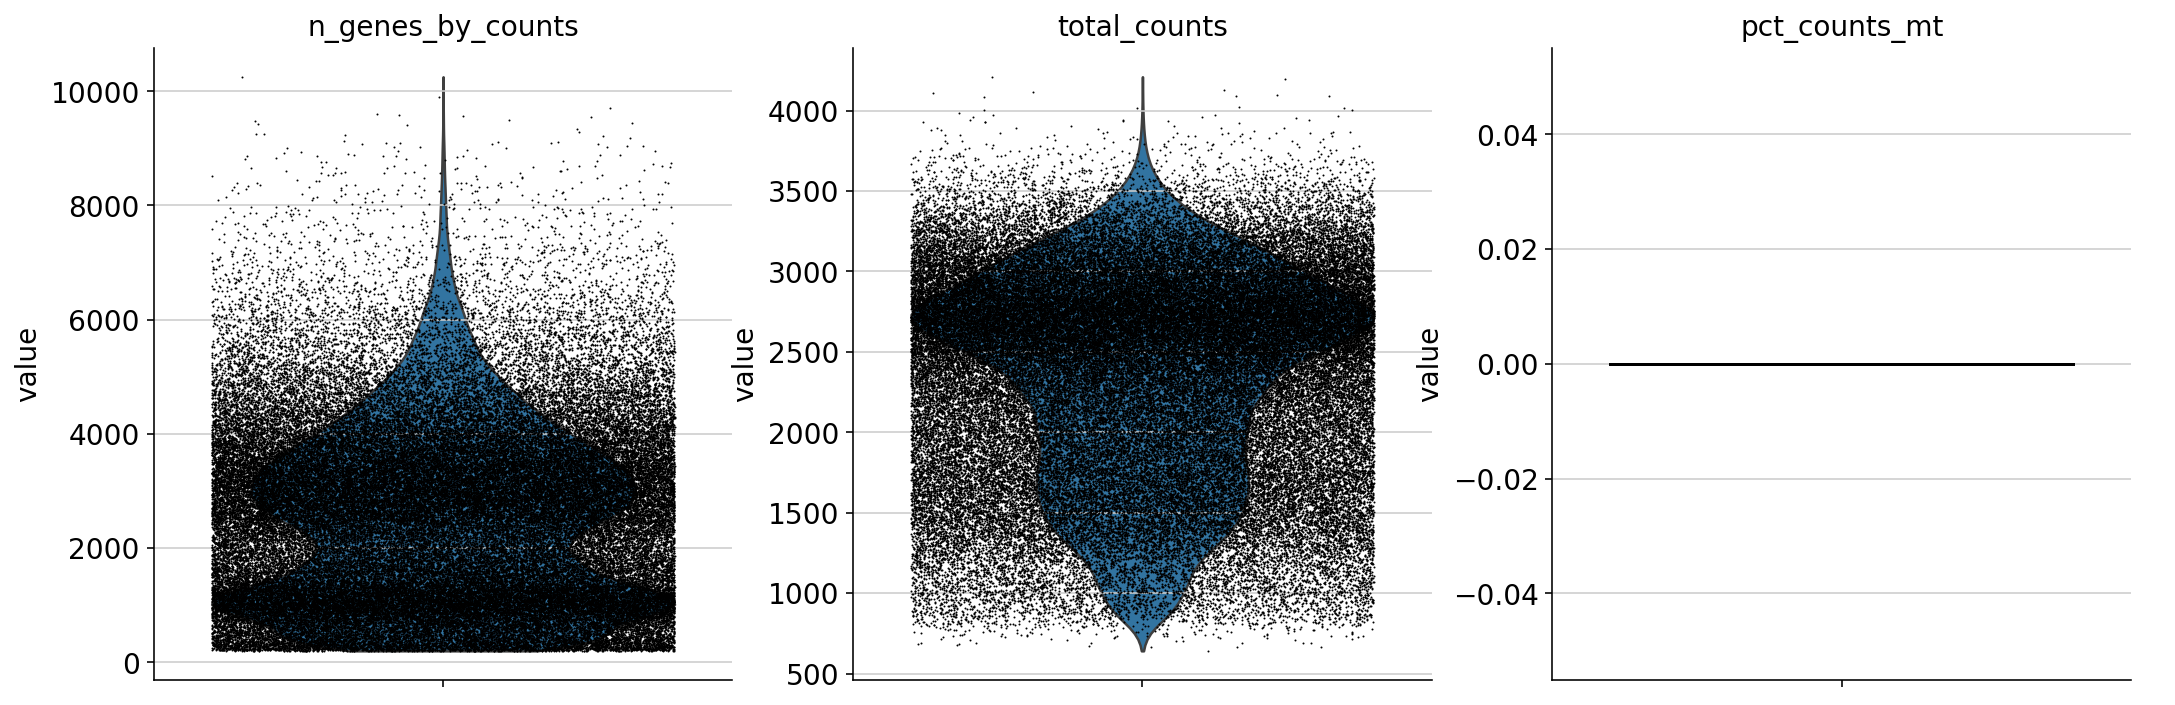

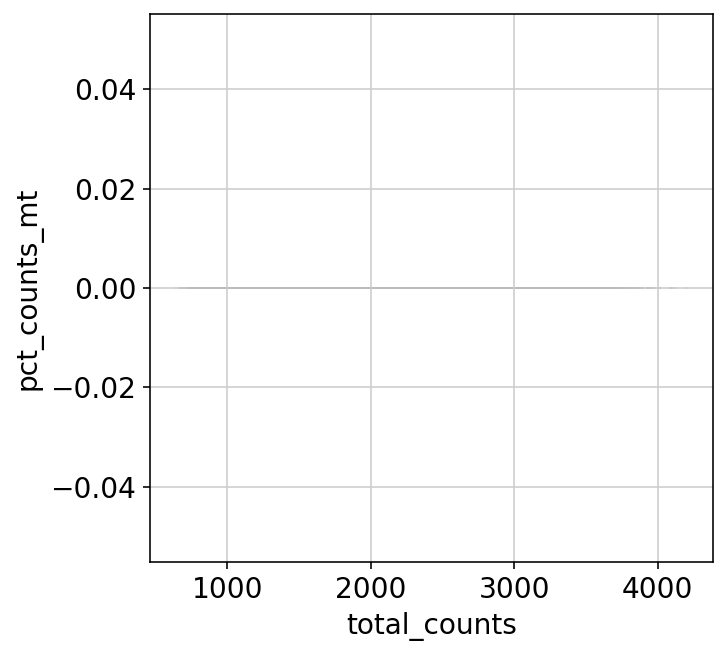

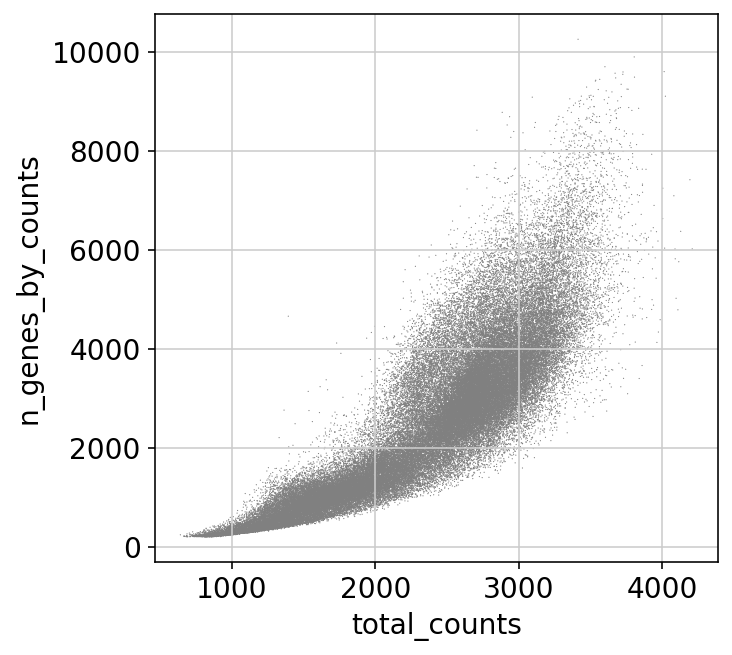

In [64]:
rcParams['figure.figsize'] = (5,5)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [65]:
#-- filtering: number of genes and % mito
adata = adata[adata.obs['n_genes_by_counts'] < 10000, :] #2500
#adata = adata[adata.obs['pct_counts_mt'] < 6, :] #-- 20% mito 

In [66]:
adata.write('./SCLC_Public_trim_raw_qc.h5ad')

In [67]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os

import numpy as np
import pandas as pd
import scanpy as sc

import pandas as pd

In [68]:
adata_raw=adata.copy()

In [69]:
adata_raw

AnnData object with n_obs × n_vars = 84859 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts

Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:251: RuntimeWarning: invalid value encountered in sqrt
  CV_eff = np.sqrt((1+a)*(1+b) - 1);
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.55
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 12.9%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.4%
Elapsed time: 4.4 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 36.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.5%
Elapsed time: 2.0 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 4.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.9%
Elapsed time: 4.8 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 9.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.2%
Elapsed time: 1.9 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 12.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 3.1%
Elapsed time: 3.1 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 1.5%
Estimated detectable doublet fraction = 56.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.6%
Elapsed time: 2.1 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 13.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.3%
Elapsed time: 5.9 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.68
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 6.9%
Elapsed time: 12.5 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:251: RuntimeWarning: invalid value encountered in sqrt
  CV_eff = np.sqrt((1+a)*(1+b) - 1);
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 33.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%
Elapsed time: 4.9 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.52
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 11.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.2%
Elapsed time: 2.1 seconds
Running UMAP...
Done.
Preprocessing...


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.37
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 48.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.5%
Elapsed time: 2.0 seconds
Running UMAP...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/scrublet.py:485: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize = fig_size)


Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 45.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.6%
Elapsed time: 3.9 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.43
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 34.7%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.1%
Elapsed time: 3.6 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 47.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.6%
Elapsed time: 1.1 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 16.5%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.7%
Elapsed time: 6.9 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.41
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 48.4%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 0.8%
Elapsed time: 2.9 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.51
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 24.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.1%
Elapsed time: 3.5 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.56
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 26.2%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.0%
Elapsed time: 4.0 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


Preprocessing...


/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 12.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 2.0%
Elapsed time: 3.5 seconds
Running UMAP...
Done.
Preprocessing...


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 25.3%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.8%
Elapsed time: 0.2 seconds
Running UMAP...
Done.
Preprocessing...


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 30.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.0%
Elapsed time: 1.5 seconds
Running UMAP...
Done.
Preprocessing...


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 25.6%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.6%
Elapsed time: 0.8 seconds
Running UMAP...
Done.
Preprocessing...


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_
/DATA05/home/youwone/.local/lib/python3.9/site-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.45
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 33.0%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 1.4%
Elapsed time: 1.2 seconds
Running UMAP...
Done.


/tmp/ipykernel_1890995/2711395708.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs['doublet_score']=scrub.doublet_scores_obs_


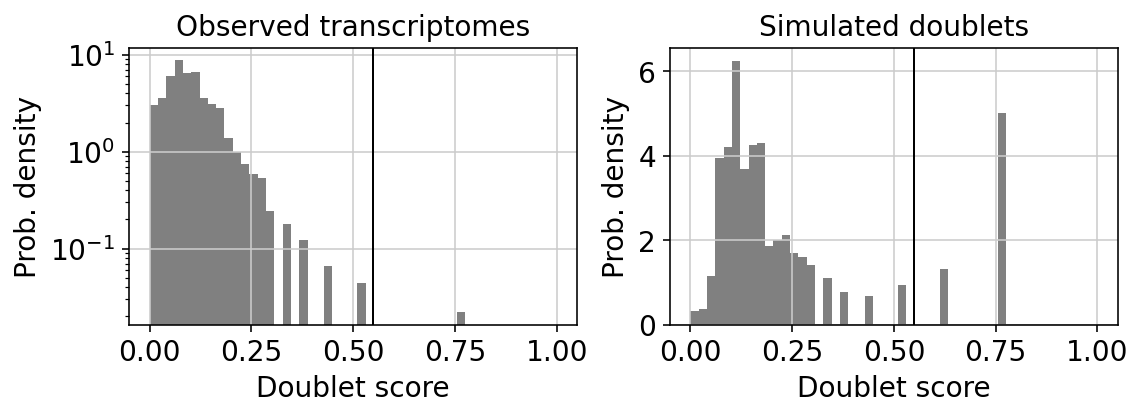

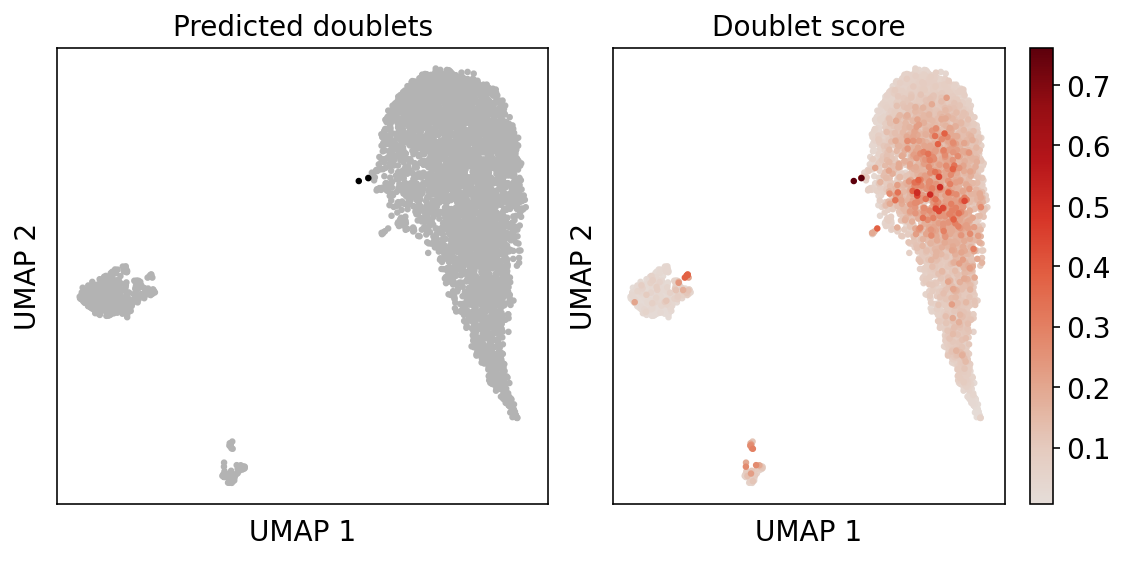

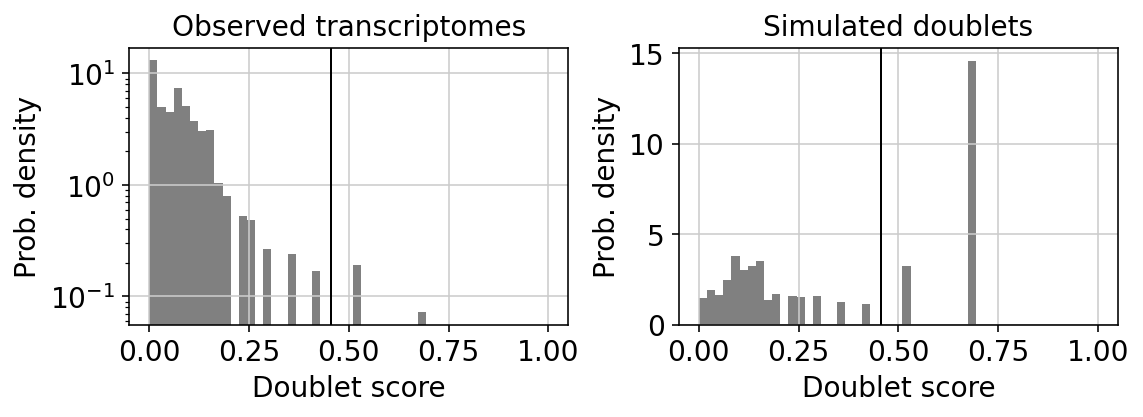

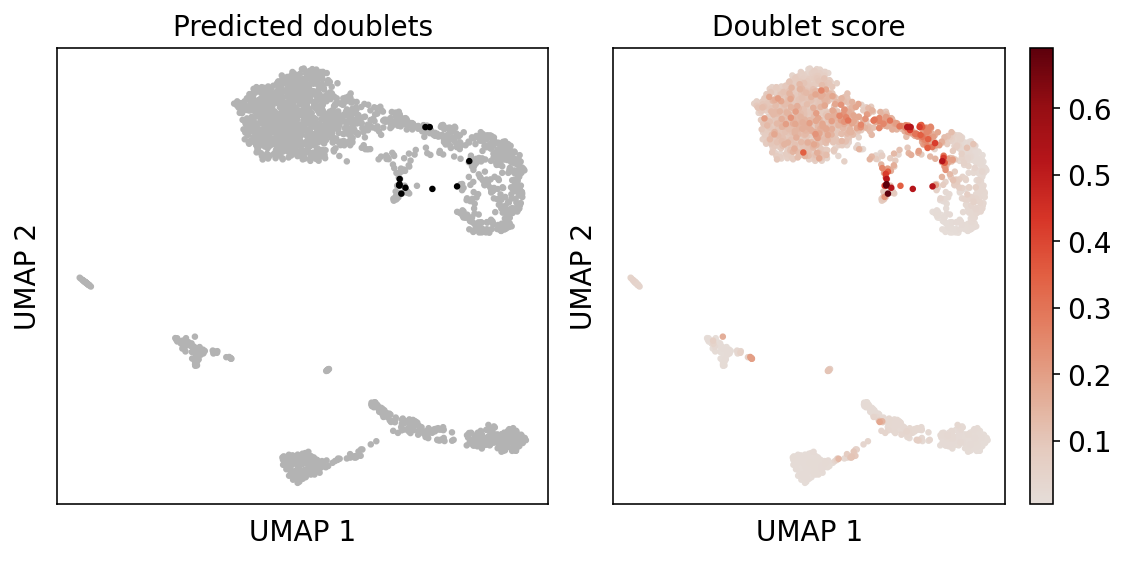

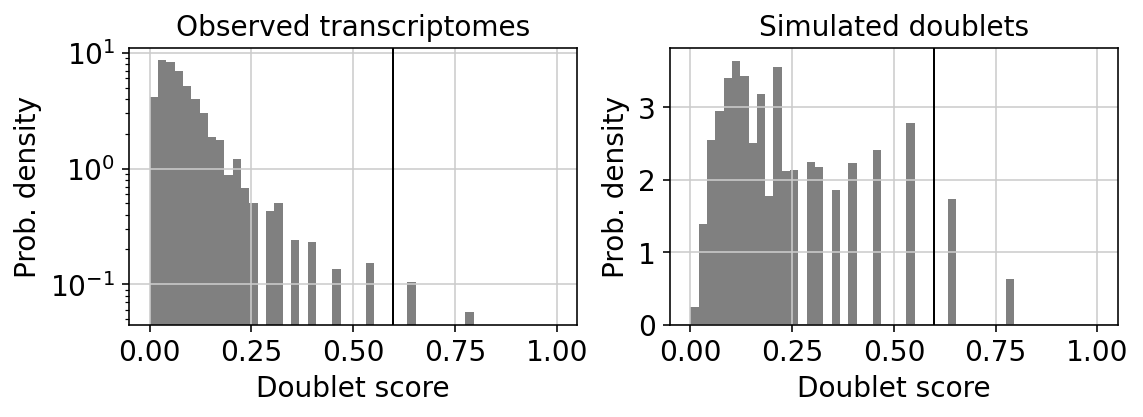

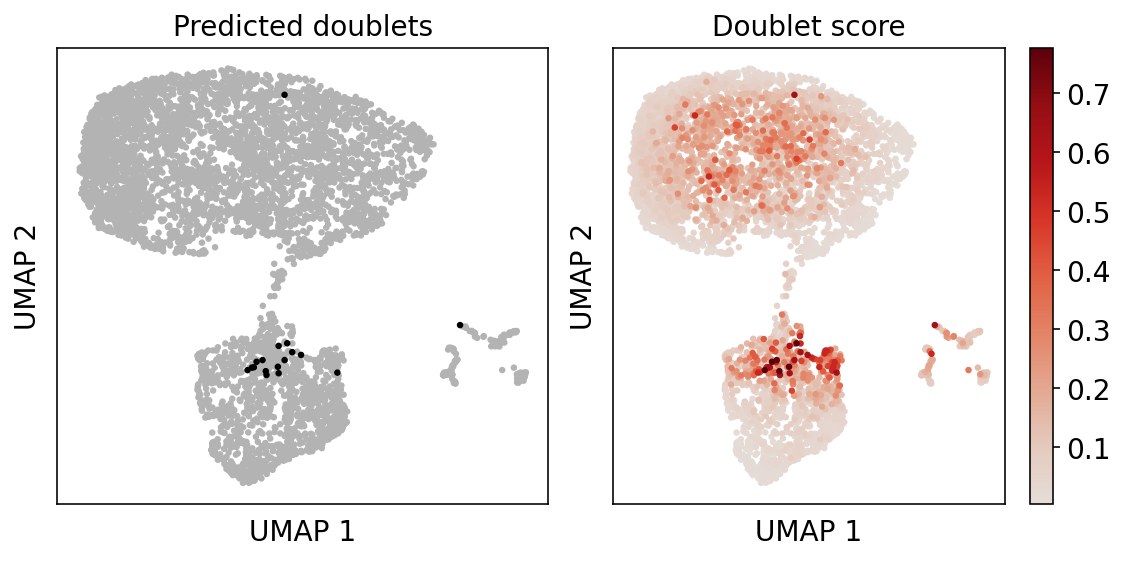

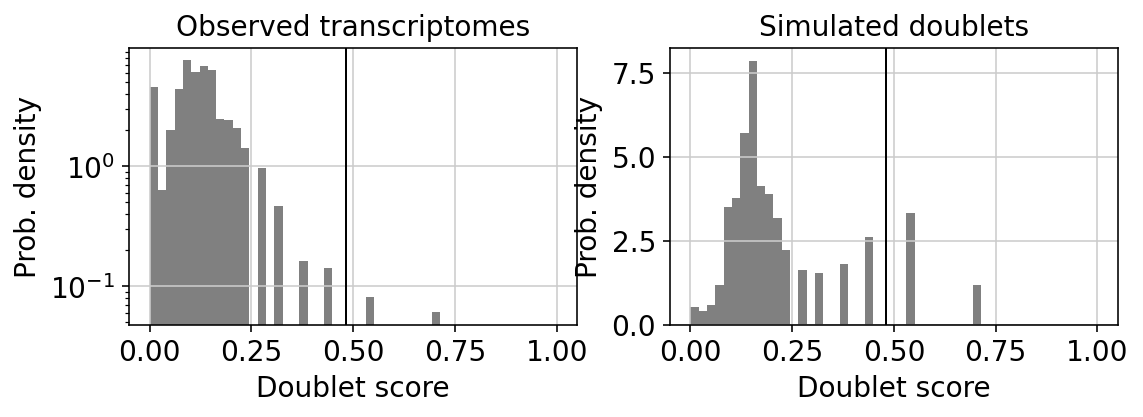

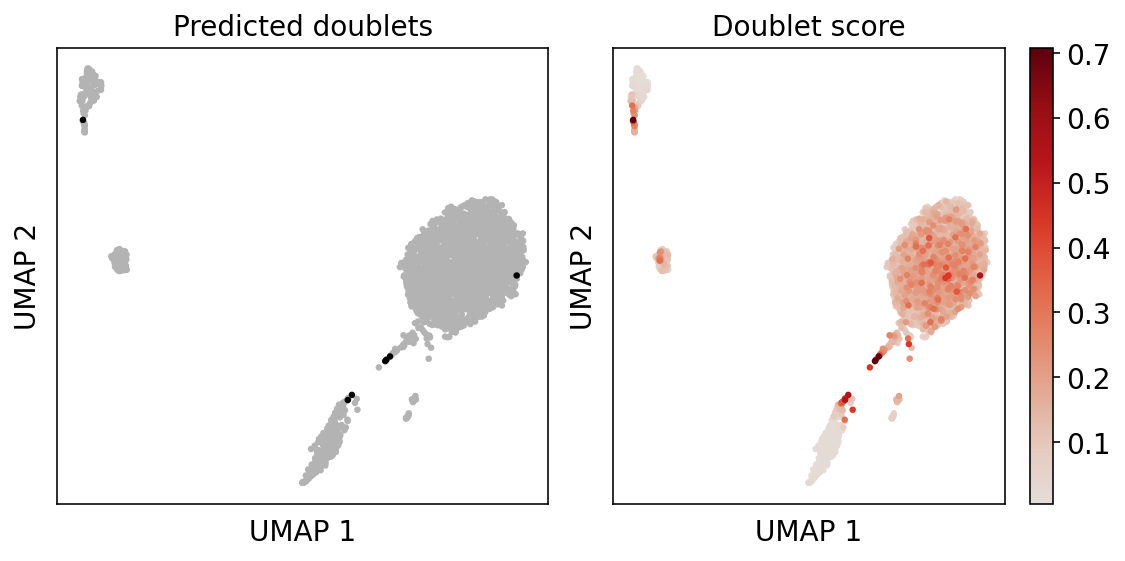

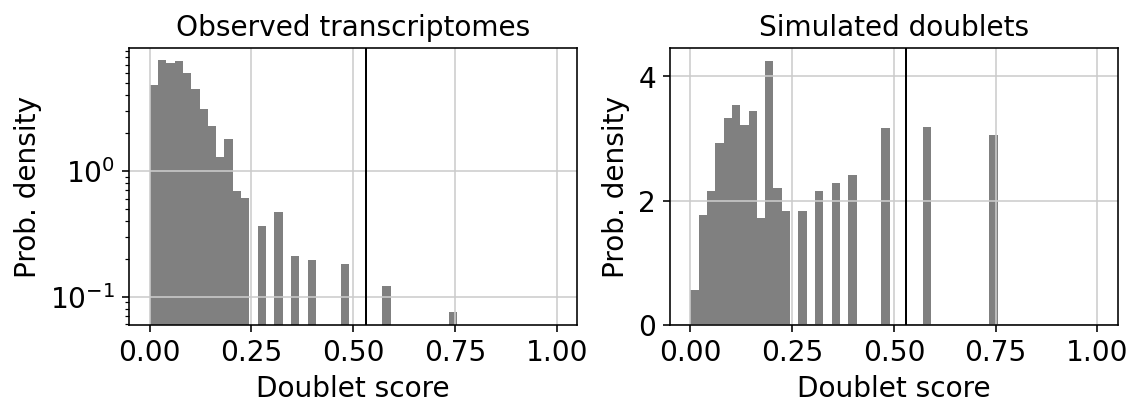

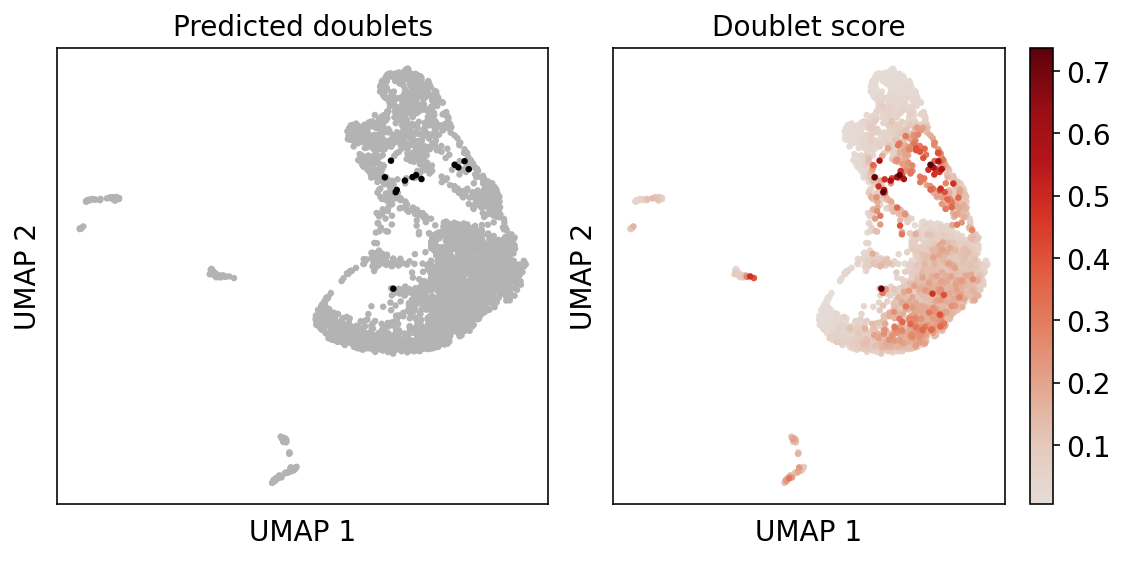

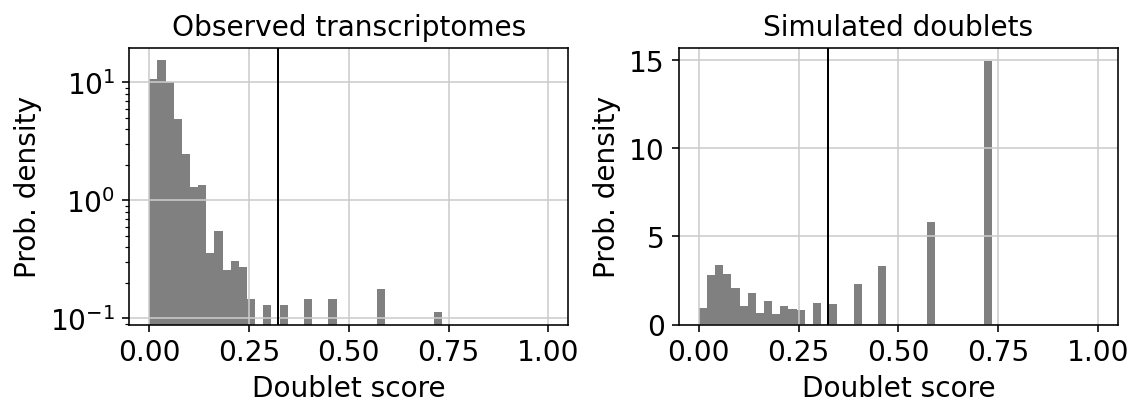

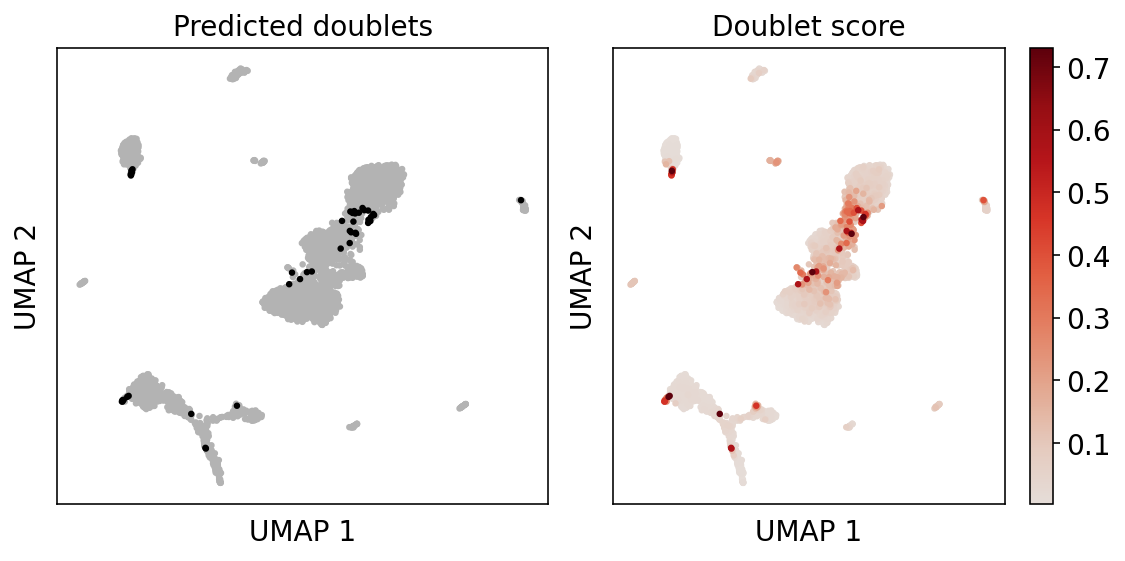

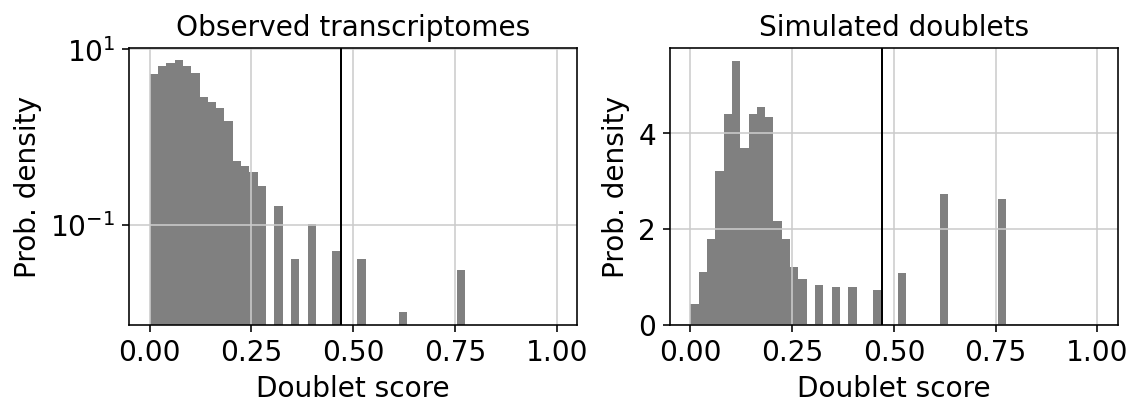

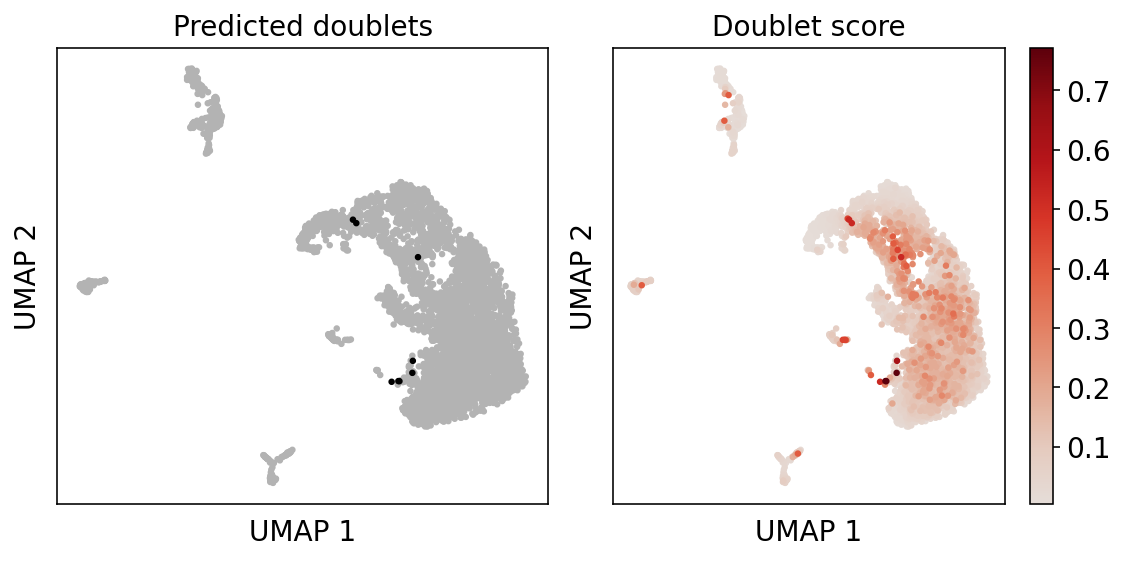

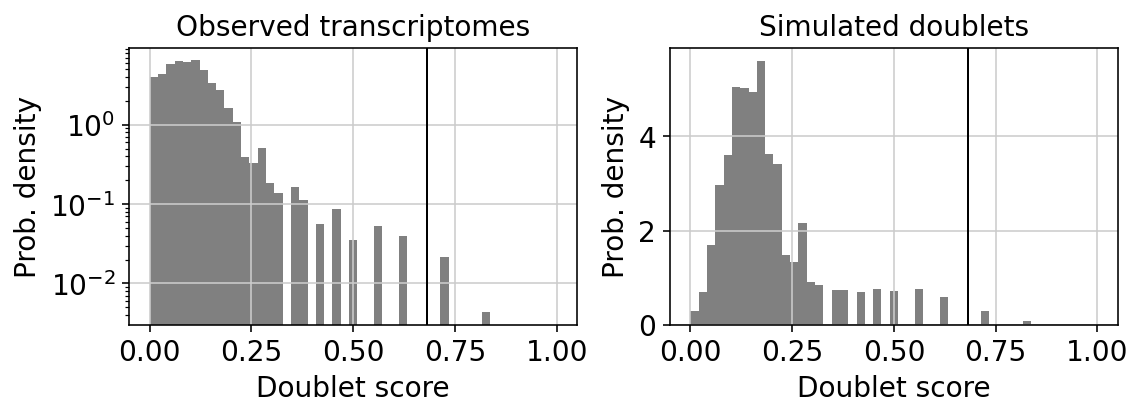

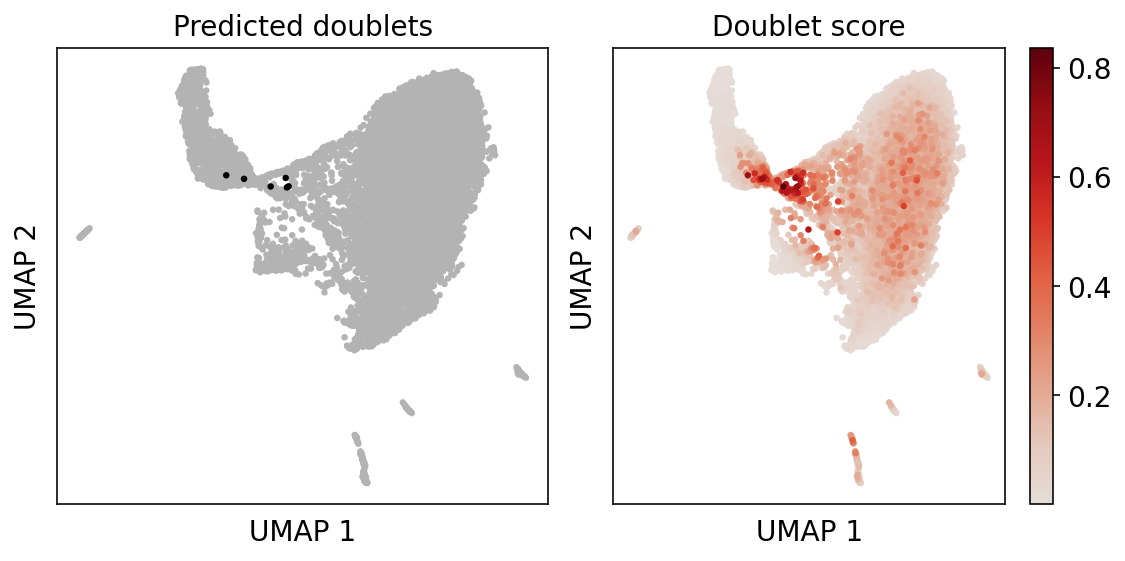

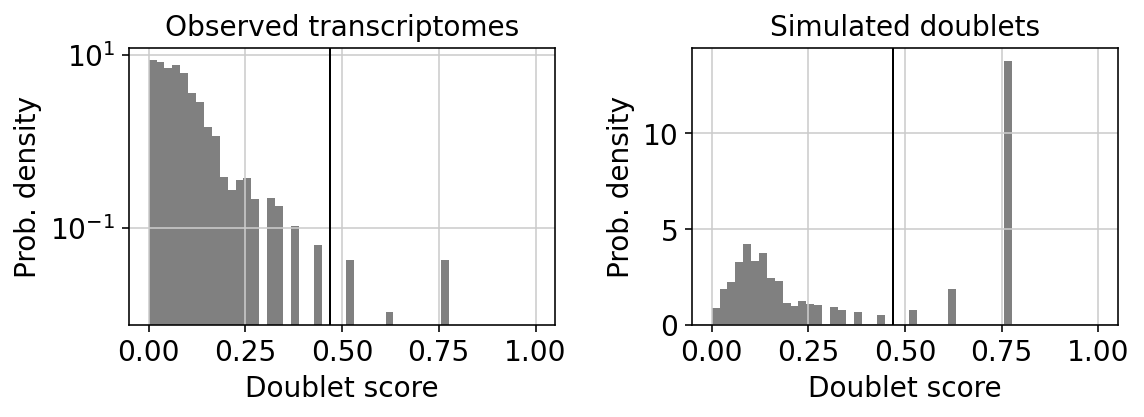

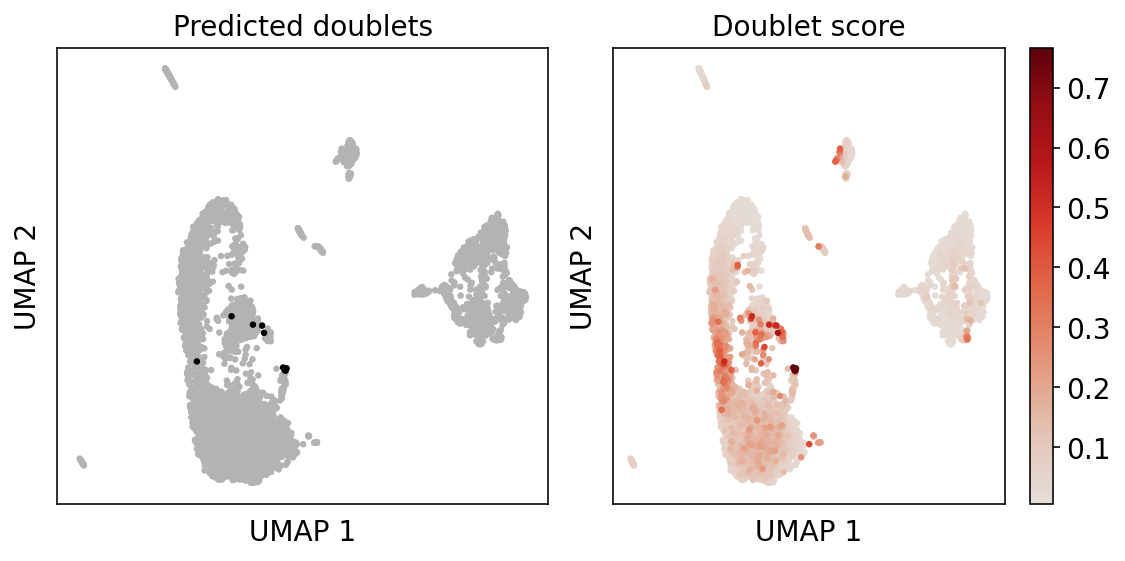

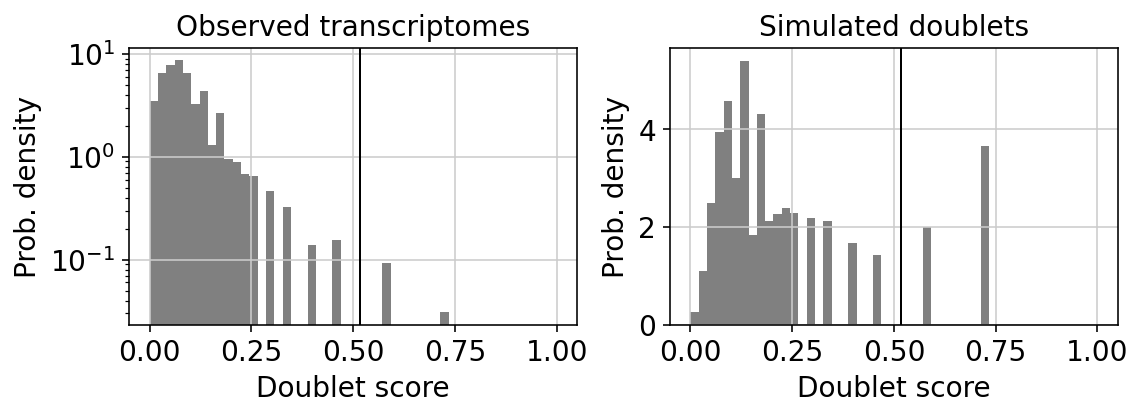

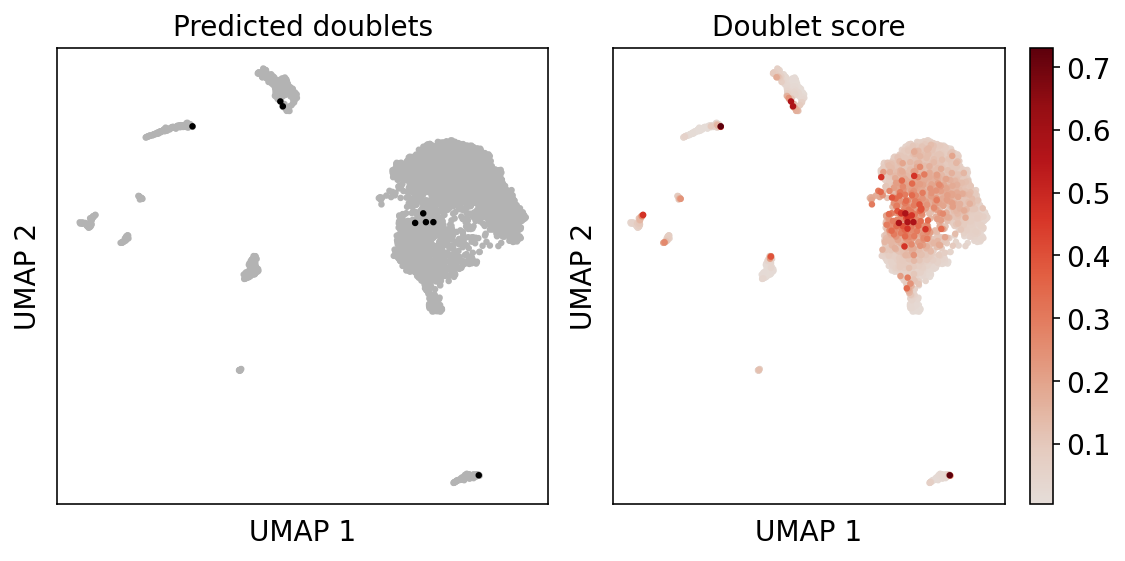

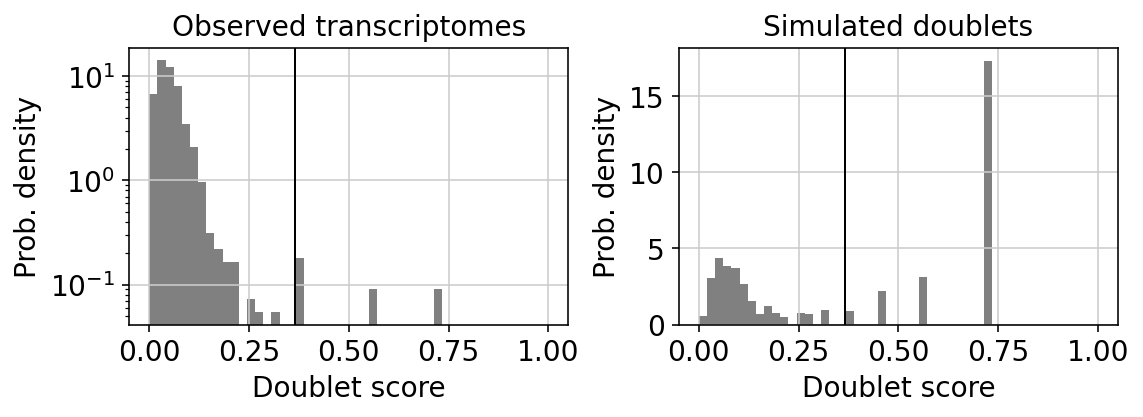

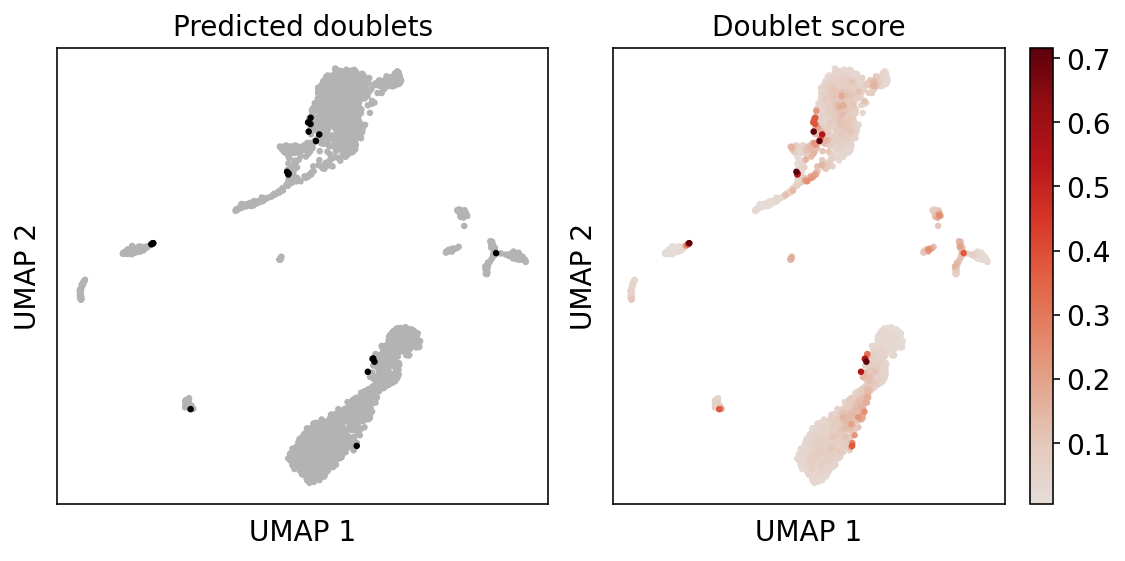

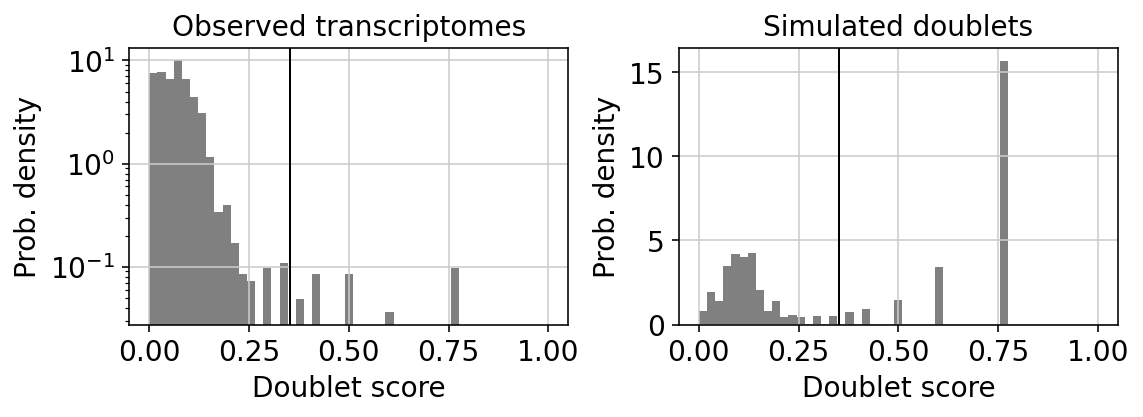

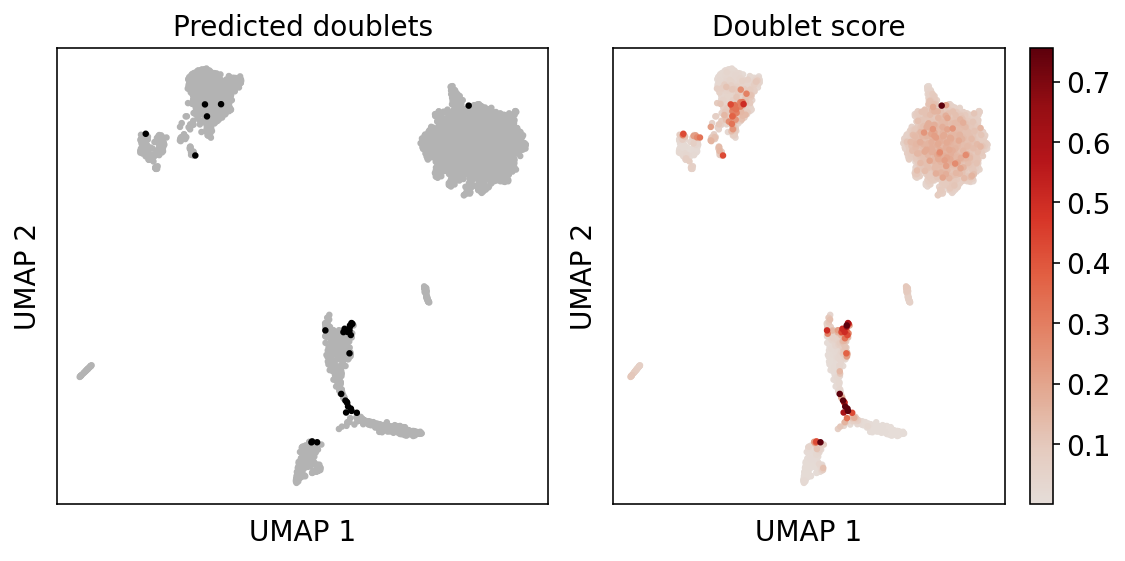

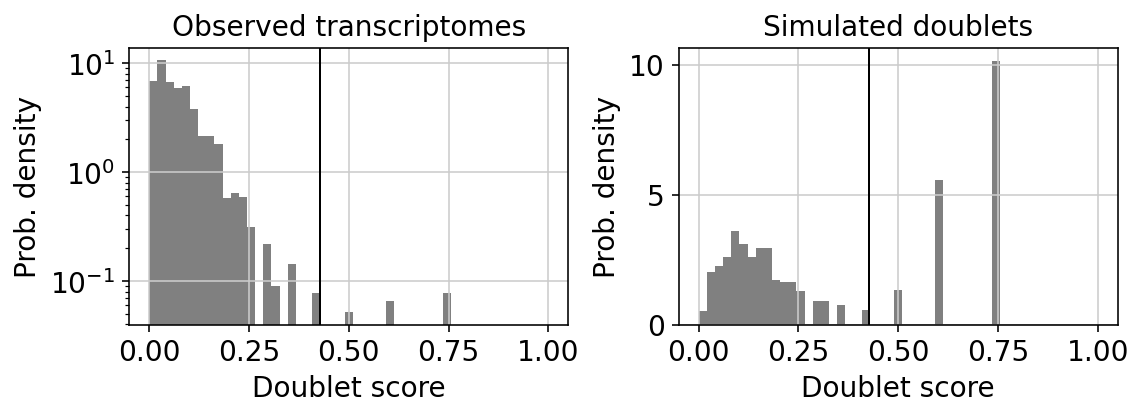

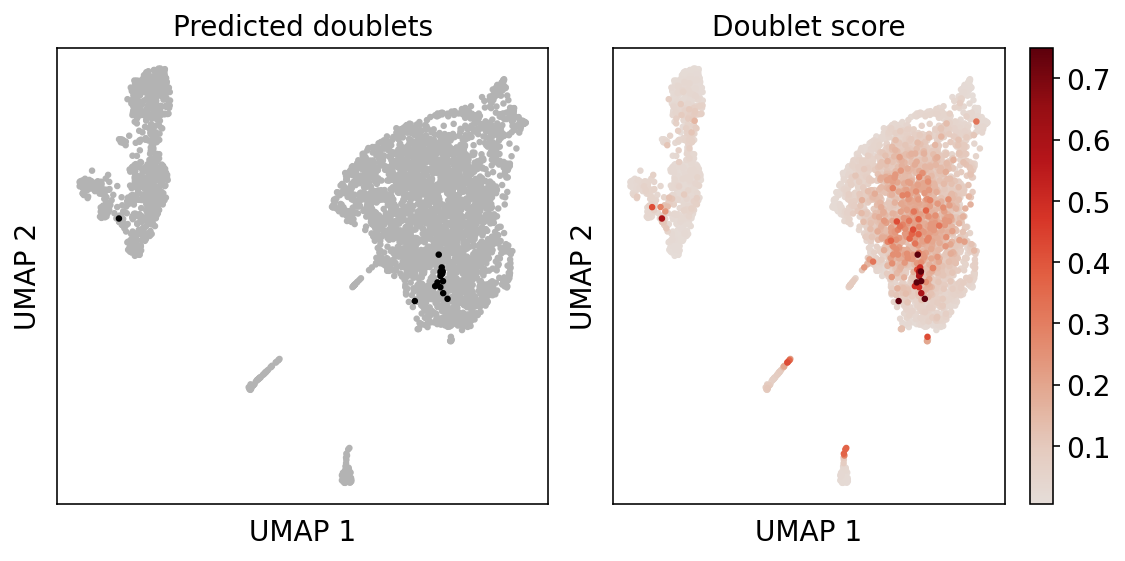

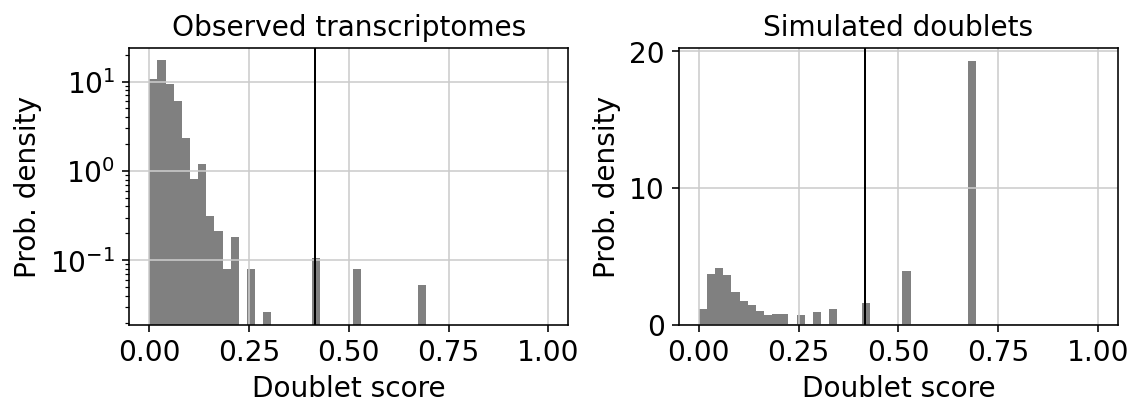

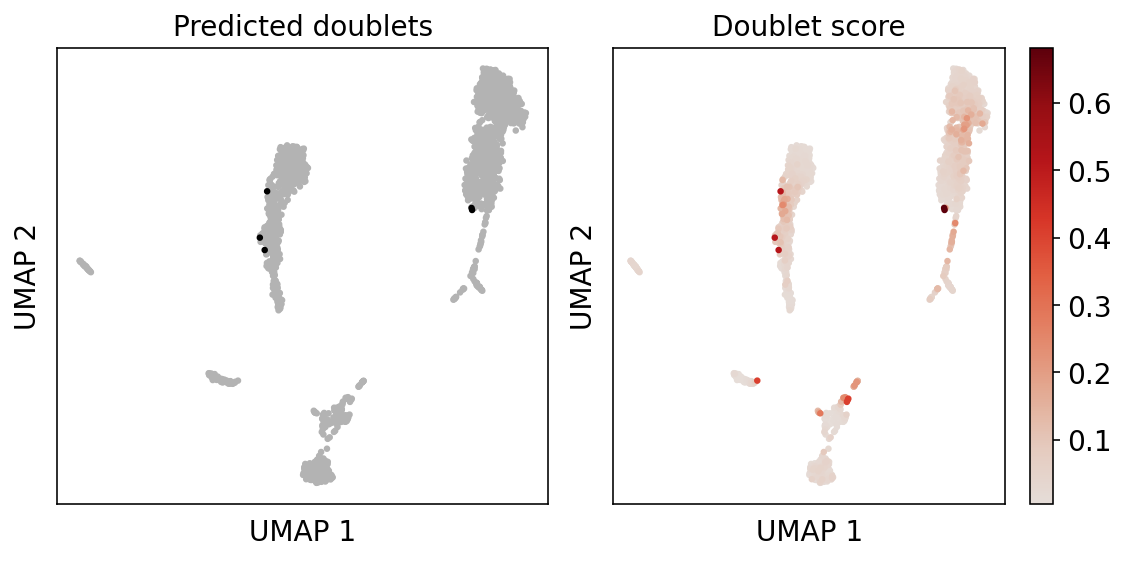

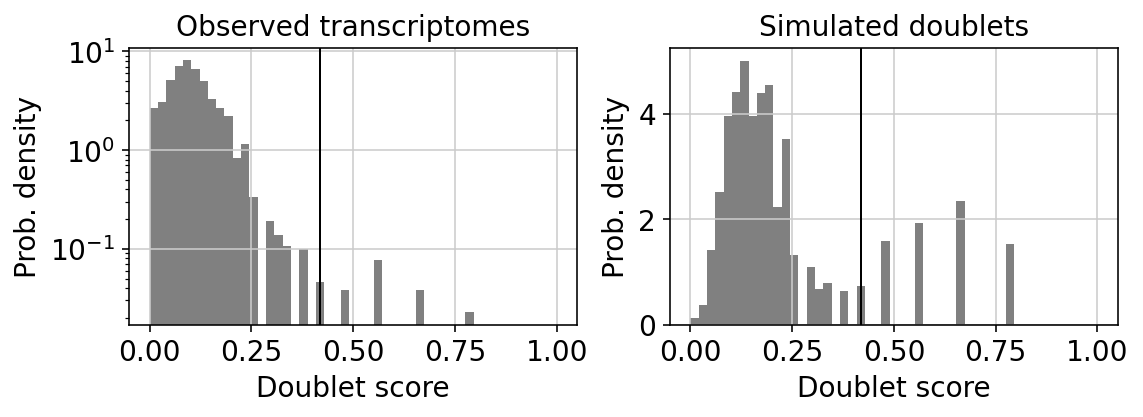

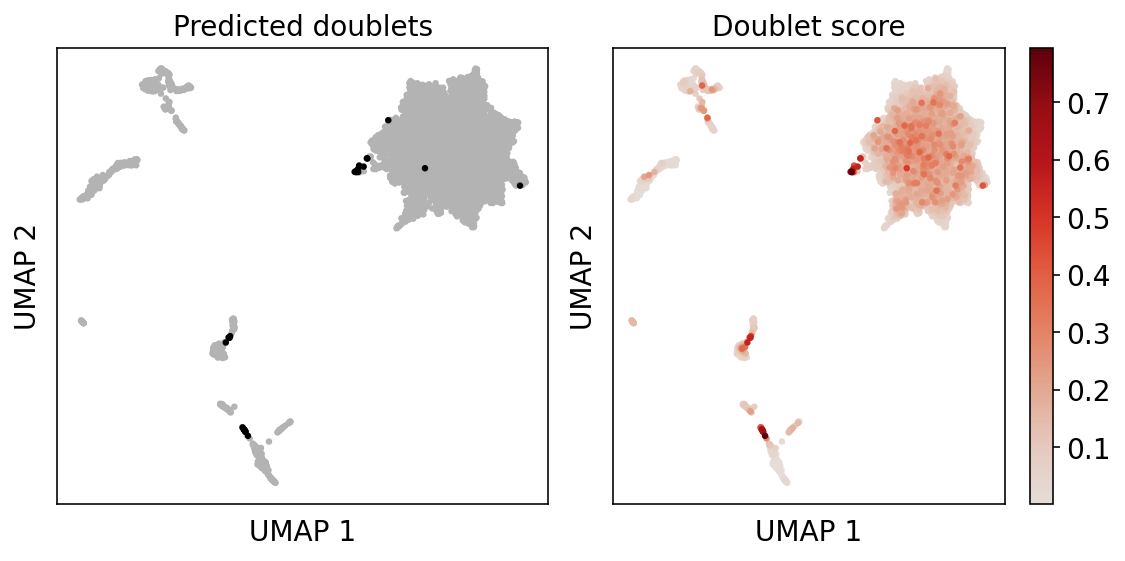

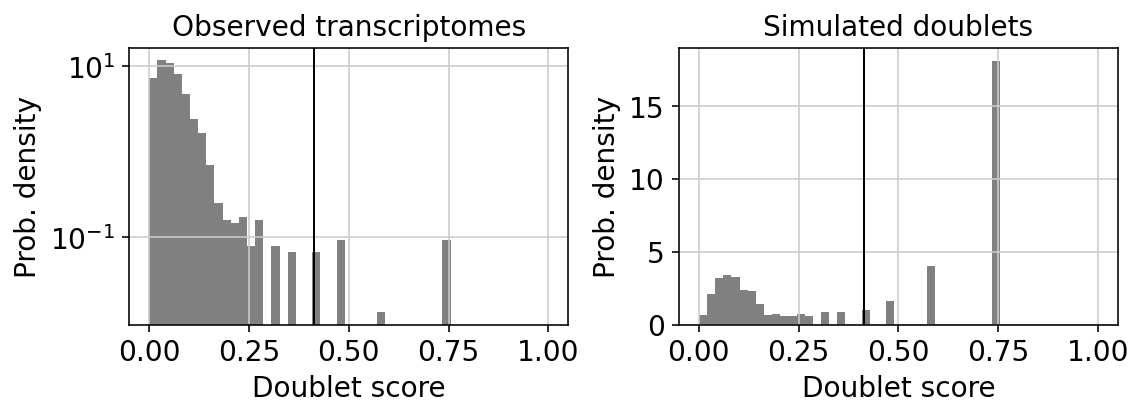

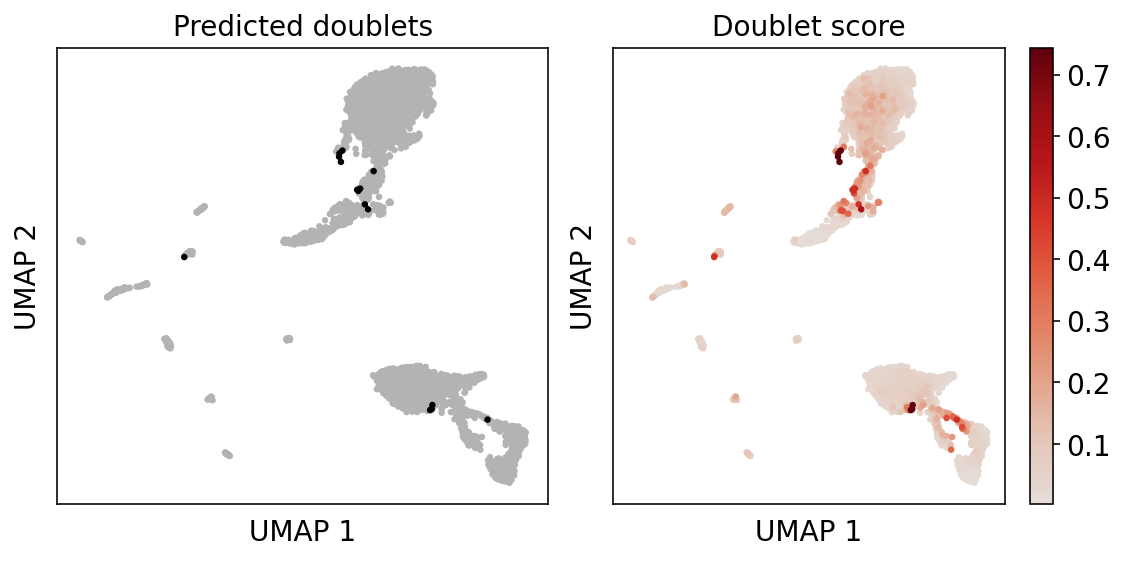

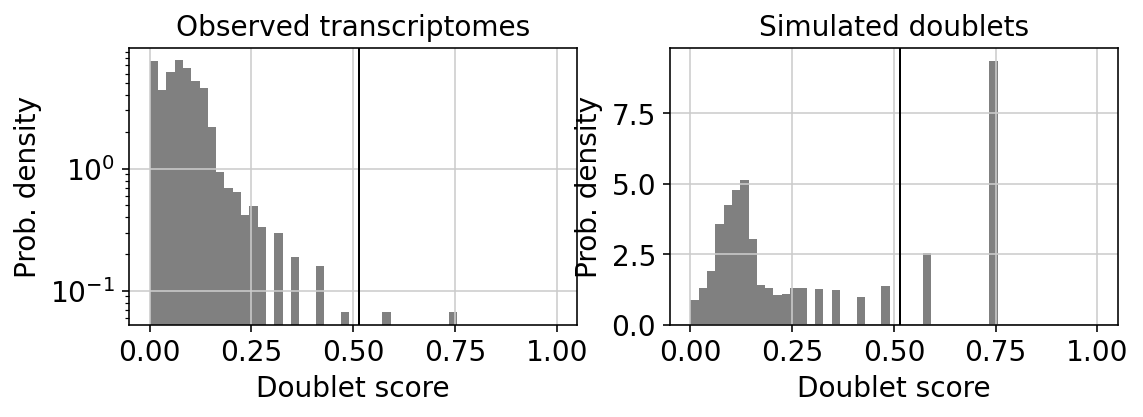

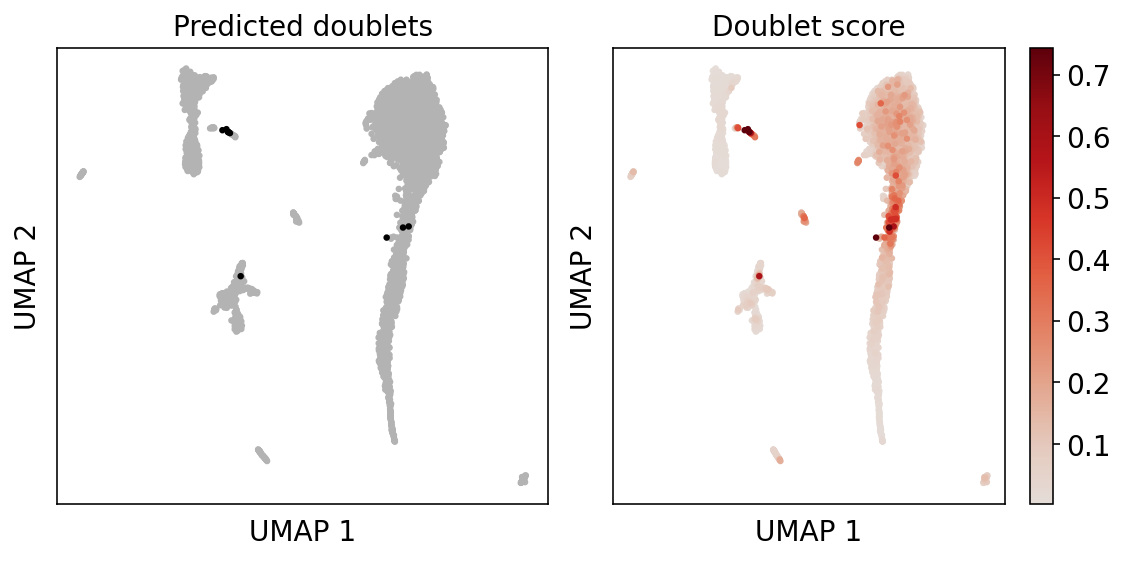

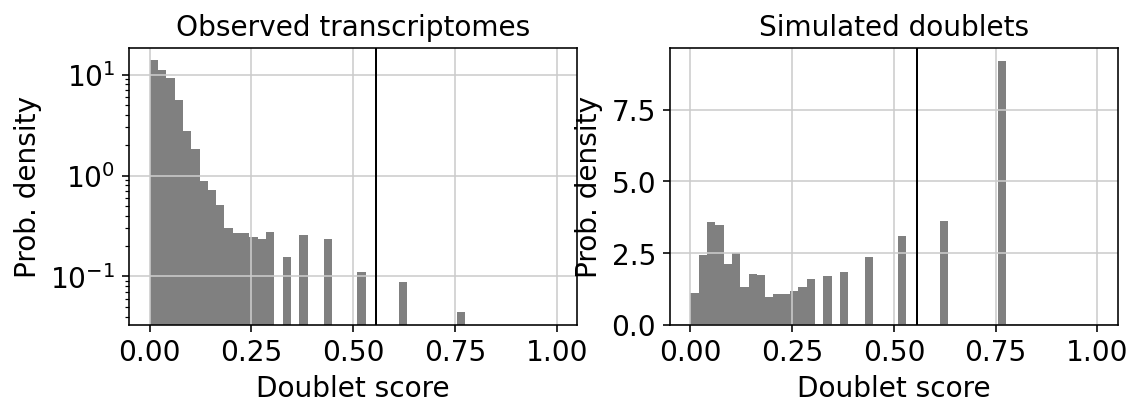

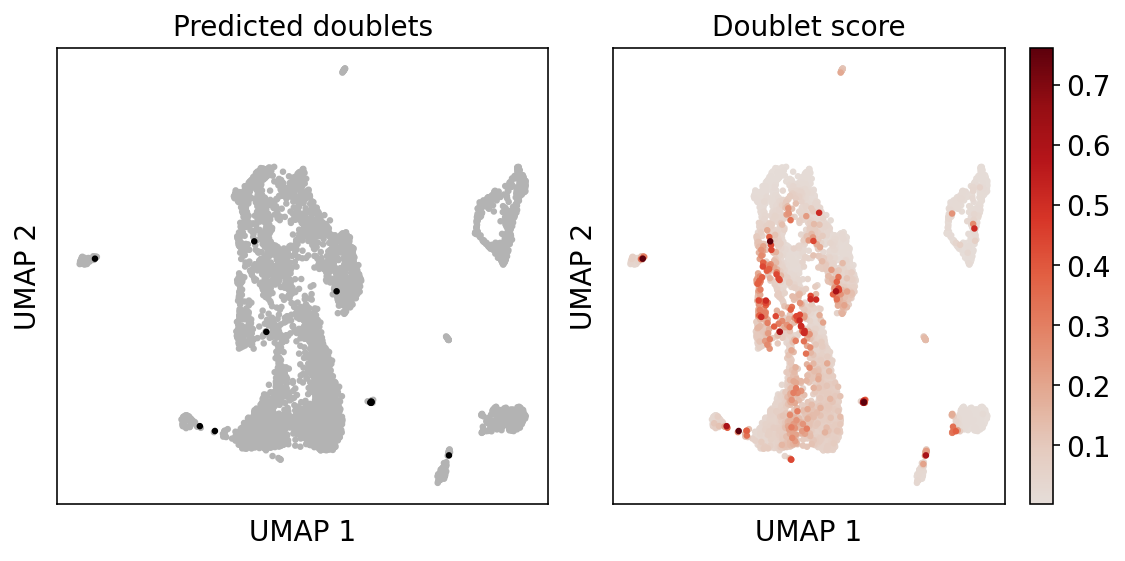

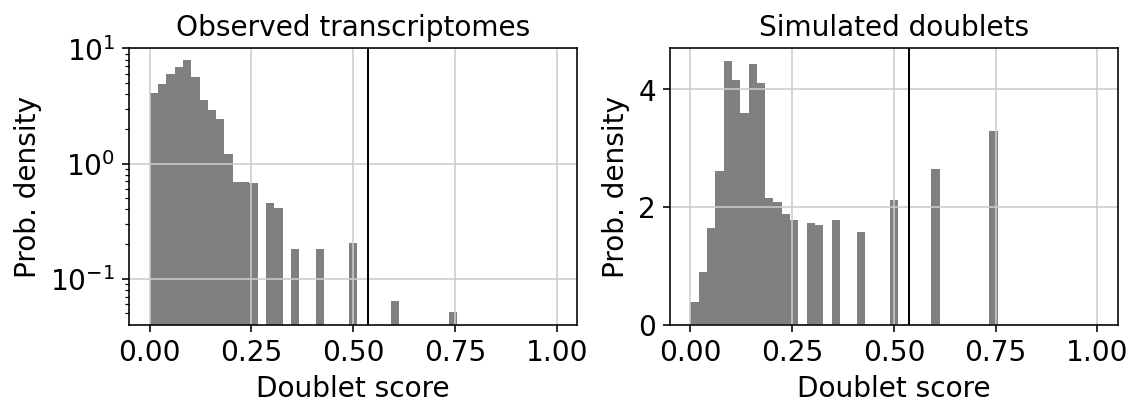

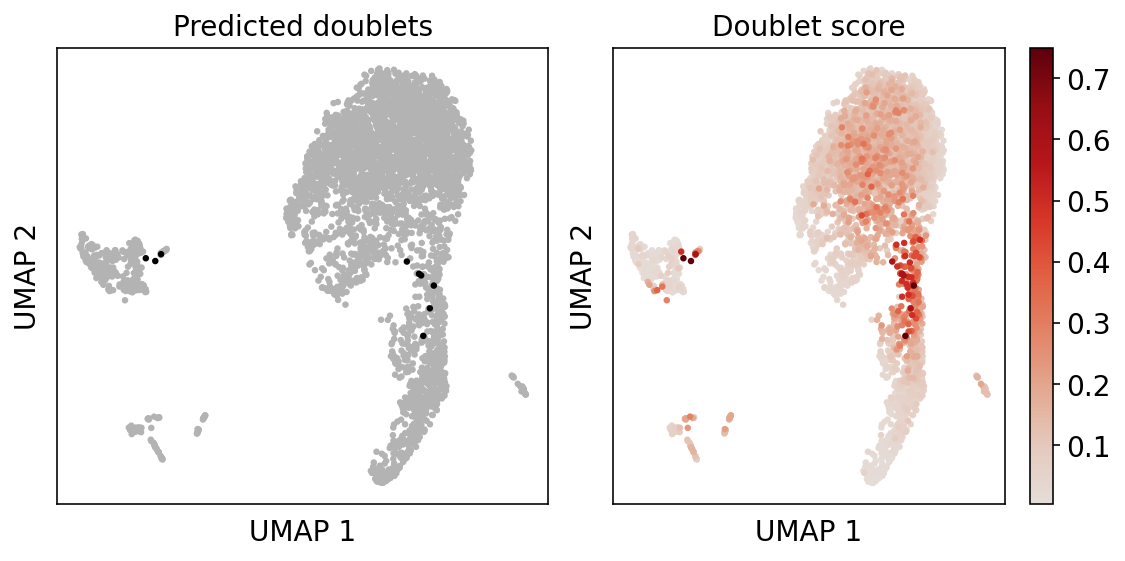

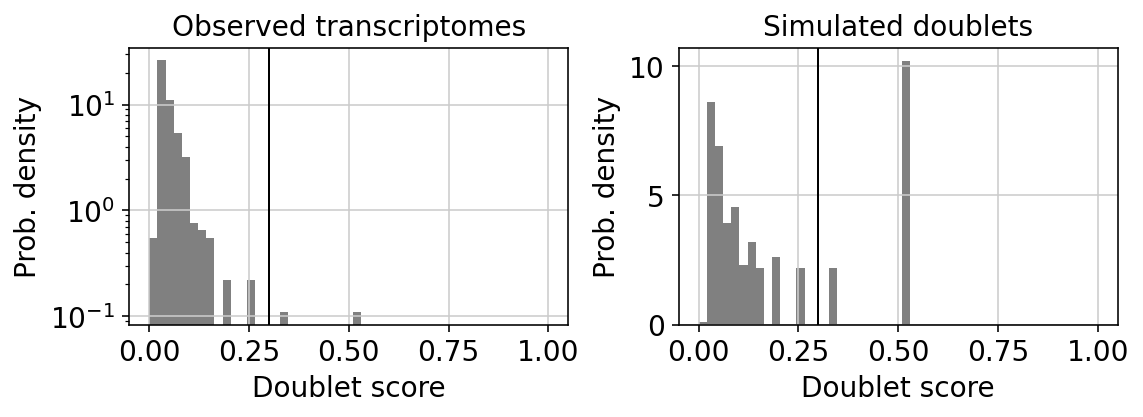

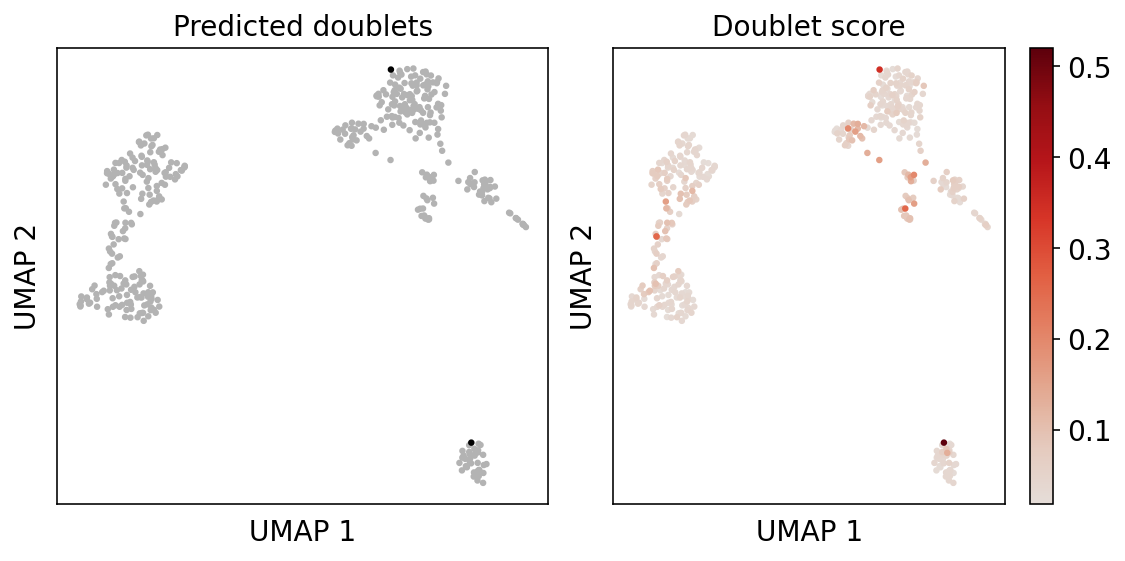

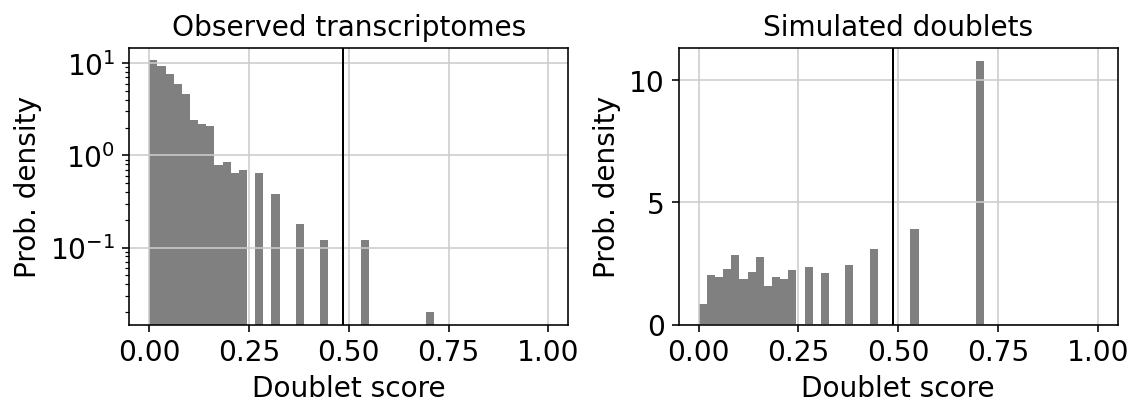

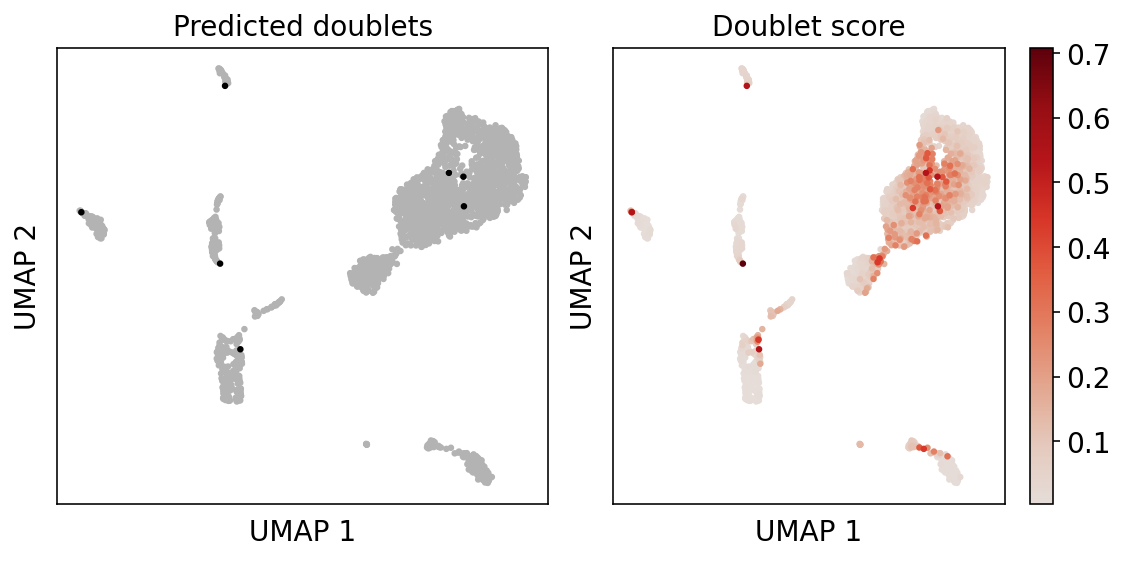

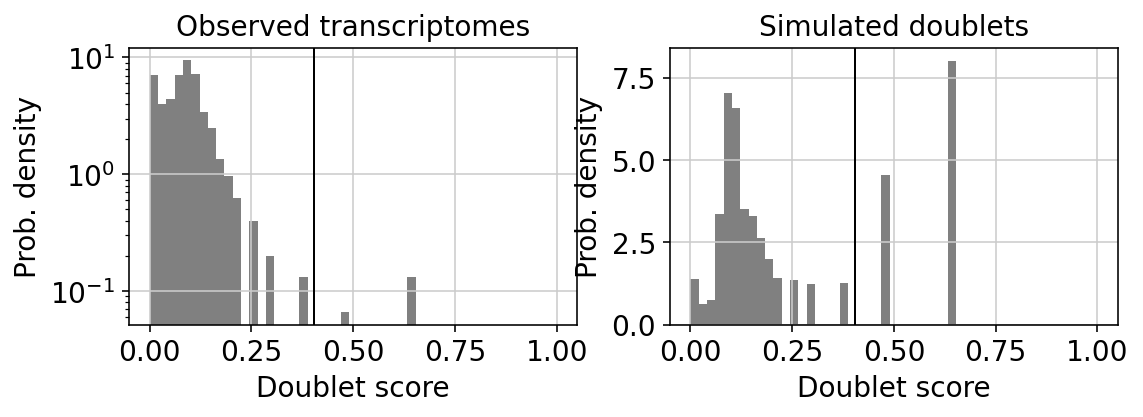

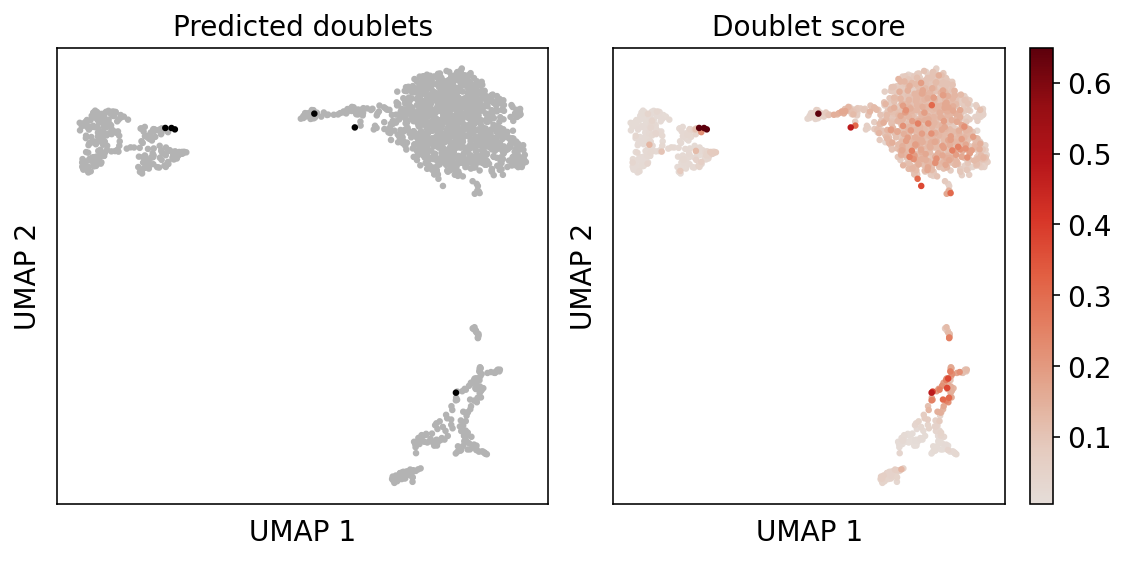

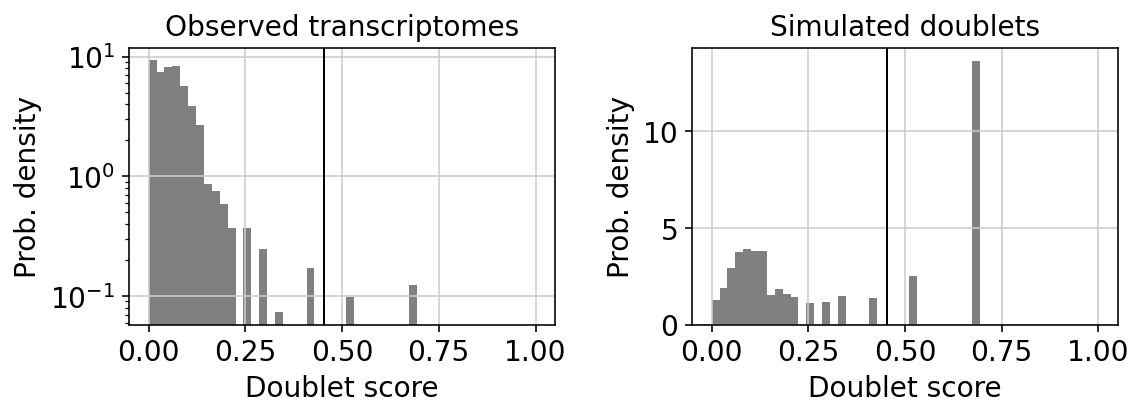

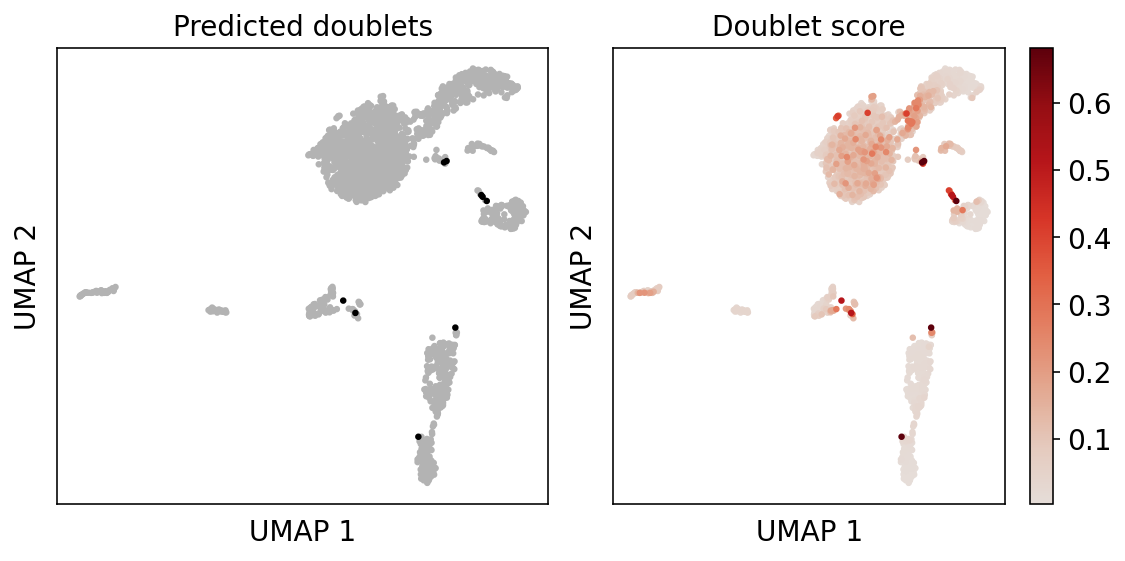

In [70]:
for sample in adata_raw.obs['donor_id'].unique():
    
    cells_of_interest = adata_raw.obs.loc[adata_raw.obs["donor_id"] == sample, :].index
    
    adata_i = adata_raw[cells_of_interest, :]
    
    scrub = scr.Scrublet(adata_i.X, expected_doublet_rate=0.06)
    
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)
    scrub.plot_histogram();
    
    print('Running UMAP...')
    
    scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
        
    print('Done.')

    scrub.plot_embedding('UMAP', order_points=True);
    
    doublet_score= pd.DataFrame({'doublet_scores' :list(doublet_scores),'predicted_doublets': list(predicted_doublets)})
        
    adata_i.obs['doublet_score']=scrub.doublet_scores_obs_
    adata_i.obs['predicted_doublets']=scrub.predicted_doublets_
    adata_i.uns['sim_doublet_score']=scrub.doublet_scores_sim_
        
    adata_i.obs[['doublet_score','predicted_doublets']].to_csv('./Files/'+ sample + "_Scrub.csv")
    
    continue

In [71]:
import glob
import re


path = r'./Files' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv("./Files/comb_csv_aggregated.csv", index=False) 


In [72]:
Scru = pd.read_csv("./Files/comb_csv_aggregated.csv",header=0)
Scru

Cell  doublet_score  predicted_doublets
0      RU1215_192110488599350       0.084301               False
1      RU1215_134396885264734       0.177658               False
2      RU1215_236167967390627       0.059170               False
3      RU1215_126700256909158       0.061706               False
4      RU1215_191227457912238       0.270611               False
...                       ...            ...                 ...
84854  RU426B_130608274533611       0.087379               False
84855  RU426B_133898400348908       0.043605               False
84856  RU426B_134044532259622       0.043605               False
84857  RU426B_131302195058989       0.248000               False
84858  RU426B_126767514962780       0.093976               False

[84859 rows x 3 columns]

In [73]:
Scru.index = Scru['Cell']
scrub=Scru.drop_duplicates()

In [79]:
adata.obs['doublet_score']=scrub['doublet_score']

/tmp/ipykernel_1890995/1498451094.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_score']=scrub['doublet_score']


In [80]:
adata.obs['predicted_doublets']=scrub['predicted_doublets']

In [81]:
adata.obs['predicted_doublets'].unique()

array([False,  True])

In [82]:
cells_of_interest = adata.obs.loc[adata.obs['predicted_doublets'].isin([  

False


    
    
    
]),:].index

adata2= adata[cells_of_interest, :]
adata2

View of AnnData object with n_obs × n_vars = 84566 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'n_cells', 'mt', 'n_cells_by

In [83]:
adata2.write('./SCLC_Public_trim_raw_qc.h5ad')